In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: C:\Users\AISHU\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [1]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

In [3]:
# 2. LOAD DATA 
oct_df = pd.read_csv("oct.csv")
nov_df = pd.read_csv("nov.csv")

MemoryError: Unable to allocate 972. MiB for an array with shape (3, 42448764) and data type int64

In [4]:
# 2. LOAD DATA (LIMIT ROWS TO AVOID MEMORY ERROR)
oct_df = pd.read_csv("oct.csv", nrows=30000)
nov_df = pd.read_csv("nov.csv", nrows=30000)

In [5]:
# 3. ADD MONTH COLUMN
oct_df['Month'] = 'October'
nov_df['Month'] = 'November'

In [6]:
# 4. COMBINE DATA
df = pd.concat([oct_df, nov_df], ignore_index=True)
print("Combined Shape:", df.shape)

Combined Shape: (60000, 10)


In [7]:
# 5. BASIC INFO
print("\nColumns:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


Columns: Index(['event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session', 'Month'],
      dtype='object')

Missing Values:
 event_time           0
event_type           0
product_id           0
category_id          0
category_code    20502
brand             9151
price                0
user_id              0
user_session         0
Month                0
dtype: int64

Data Types:
 event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
Month             object
dtype: object


In [8]:
# 6. CLEANING
df.drop_duplicates(inplace=True)
df.fillna(method='ffill', inplace=True)

C:\Users\AISHU\AppData\Local\Temp\ipykernel_14628\1529700258.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
# 7. DESCRIPTIVE STATS
print(df.describe())

         product_id   category_id         price       user_id
count  5.998600e+04  5.998600e+04  59986.000000  5.998600e+04
mean   1.107943e+07  2.057040e+18    291.362707  5.333798e+08
std    1.180578e+07  1.739687e+16    362.749684  1.876811e+07
min    1.001588e+06  2.053014e+18      0.000000  3.064418e+08
25%    1.005256e+06  2.053014e+18     63.840000  5.157826e+08
50%    5.500092e+06  2.053014e+18    161.980000  5.294792e+08
75%    1.700006e+07  2.053014e+18    360.110000  5.511716e+08
max    6.050000e+07  2.175420e+18   2574.070000  5.662956e+08


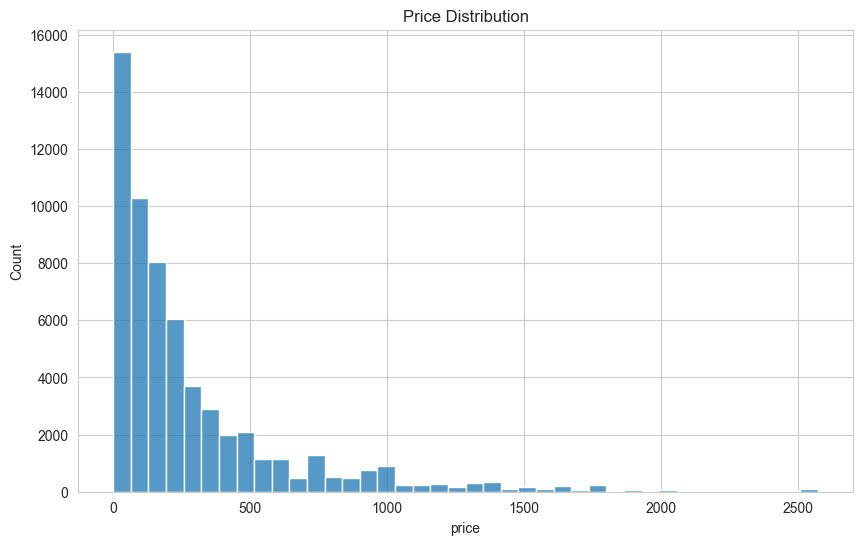

In [10]:
# 8. PRICE DISTRIBUTION
if 'price' in df.columns:
    sns.histplot(df['price'], bins=40)
    plt.title("Price Distribution")
    plt.show()

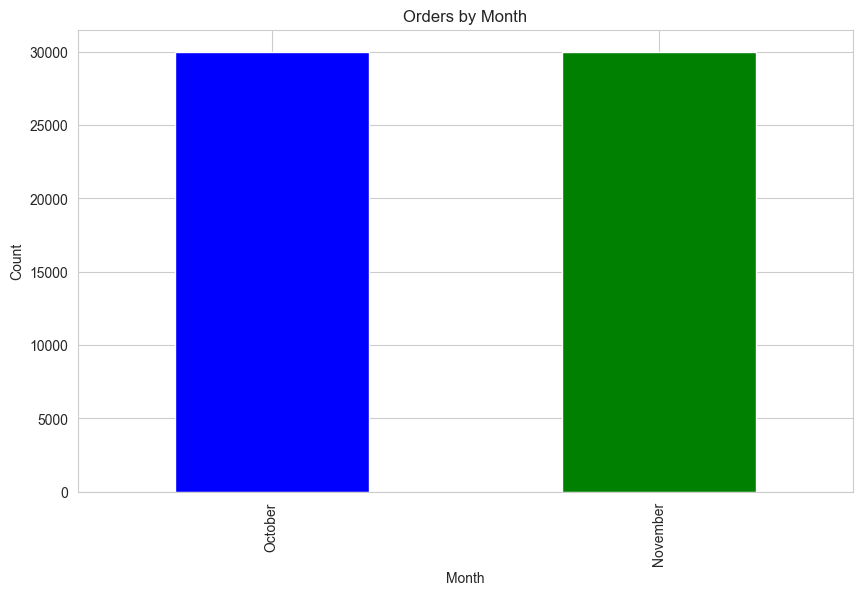

In [11]:
# 9. MONTHLY SALES COUNT
monthly_orders = df['Month'].value_counts()
monthly_orders.plot(kind='bar', color=['blue','green'])
plt.title("Orders by Month")
plt.ylabel("Count")
plt.show()

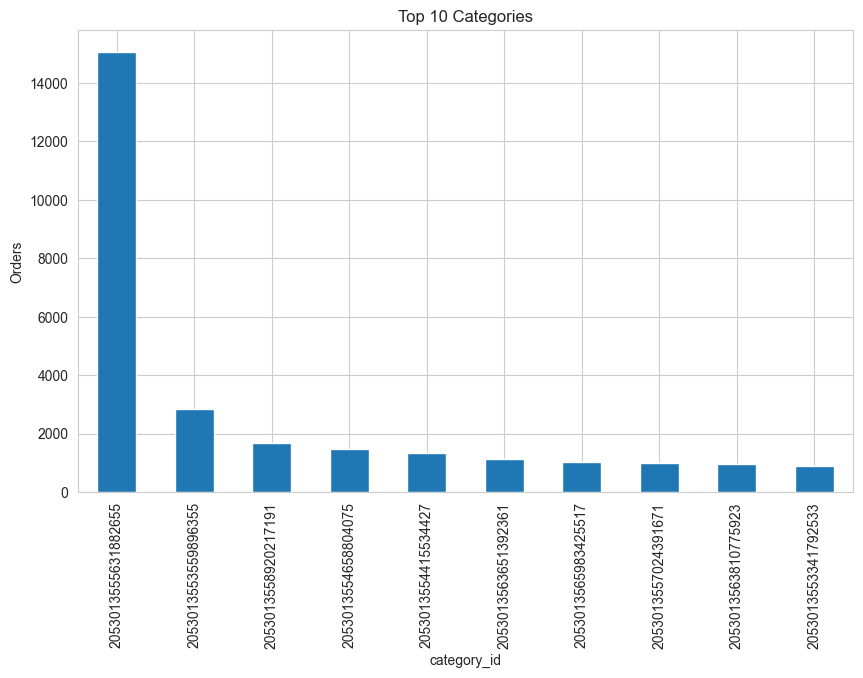

In [12]:
# 10. TOP CATEGORIES
if 'category_id' in df.columns:
    top_cat = df['category_id'].value_counts().head(10)
    top_cat.plot(kind='bar')
    plt.title("Top 10 Categories")
    plt.ylabel("Orders")
    plt.show()

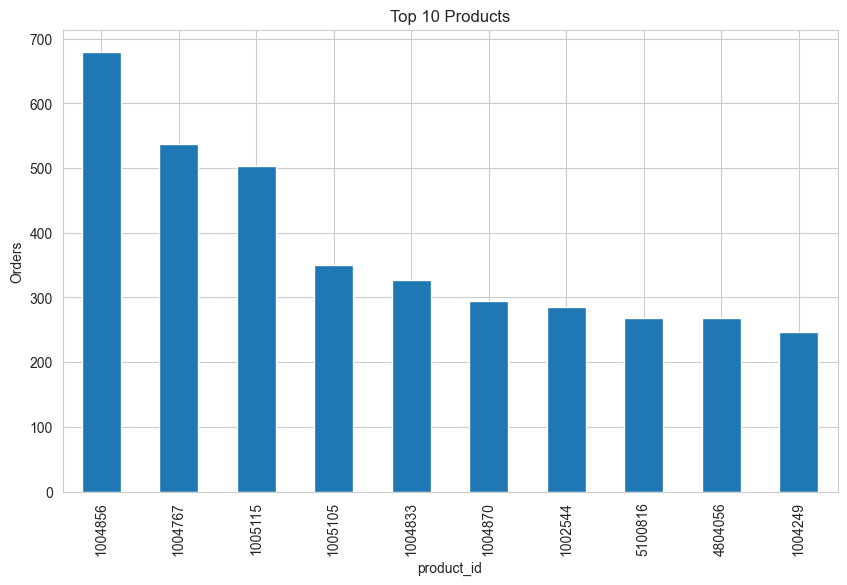

In [13]:
# 11. TOP PRODUCTS
if 'product_id' in df.columns:
    top_prod = df['product_id'].value_counts().head(10)
    top_prod.plot(kind='bar')
    plt.title("Top 10 Products")
    plt.ylabel("Orders")
    plt.show()

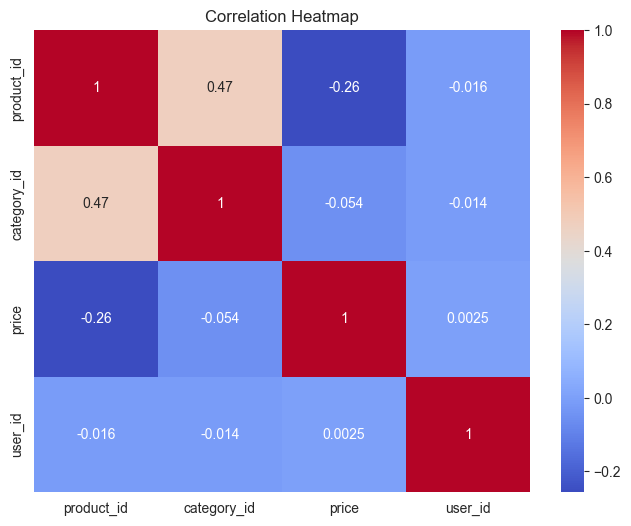

In [14]:
# 12. CORRELATION HEATMAP
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# 13. SAVE COMBINED DATA
df.to_csv("combined_retail_sample.csv", index=False)

print("Analysis Completed Successfully!")

Analysis Completed Successfully!


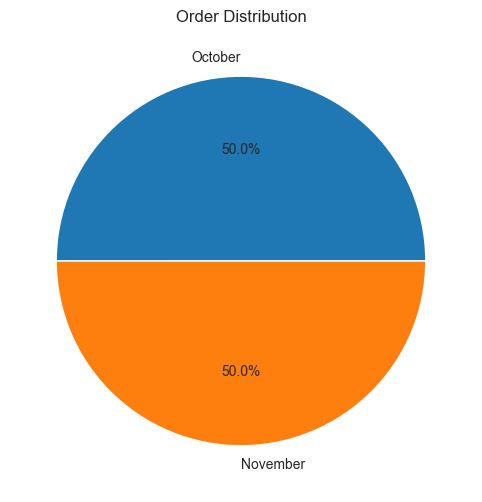

In [16]:
monthly_orders.plot(kind='pie', autopct='%1.1f%%')
plt.title("Order Distribution")
plt.ylabel('')
plt.show()
